In [41]:
!pip install prophet

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
from prophet import Prophet

In [3]:
df = pd.read_csv('/content/Stock Price.csv')

In [30]:
display(df.head(10))
display(df.tail(10))
display(df.info())

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


,date,open,high,low,close,volume,Name
619030,2018-01-25,78.47,79.38,78.345,79.25,2327262,ZTS
619031,2018-01-26,79.49,80.13,79.380,80.09,2532808,ZTS
619032,2018-01-29,79.81,79.95,79.110,79.18,2662383,ZTS
619033,2018-01-30,78.44,78.69,77.910,78.35,3808707,ZTS
619034,2018-01-31,78.49,78.77,76.540,76.73,4136360,ZTS
619035,2018-02-01,76.84,78.27,76.690,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.730,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.180,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.130,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.690,73.86,4534912,ZTS


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


None

In [8]:
df.isnull().sum()

,0
date,0
open,11
high,8
low,8
close,0
volume,0
Name,0


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [17]:
categorical_col = ['Name']

df_encoded = pd.get_dummies(df, columns = categorical_col, drop_first = True)
df_encoded

,date,open,high,low,close,volume,Name_AAL,Name_AAP,Name_AAPL,Name_ABBV,...,Name_XL,Name_XLNX,Name_XOM,Name_XRAY,Name_XRX,Name_XYL,Name_YUM,Name_ZBH,Name_ZION,Name_ZTS
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [19]:
X = df_encoded.drop('close', axis=1)
y = df_encoded['close']

In [31]:
X_subset = X[0:10000]
y_subset = y[0:10000]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['open', 'high', 'low', 'volume']])
X_test_scaled = scaler.transform(X_test[['open', 'high', 'low', 'volume']])

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],1)),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [38]:
model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 18.5232 - mae: 3.2088
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 18.6676 - mae: 3.1698
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 18.0038 - mae: 3.1083
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 18.8596 - mae: 3.1495
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 19.1966 - mae: 3.2101
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 18.6827 - mae: 3.1872
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 17.4805 - mae: 3.0630
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 19.0373 - mae: 3.1682
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 18.2994 - mae: 3.1206
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 17.3840 - mae: 2.9955


In [39]:
model.evaluate(X_test_scaled, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9317 - mae: 1.2090


[3.1713128089904785, 1.2366386651992798]

In [44]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [48]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 3.1713131597195927
Root Mean Squared Error: 1.7808181152828586
Mean Absolute Error: 1.2366387851394651


In [50]:
prophet_df = df[['date', 'close']]
prophet_df.columns = ['ds', 'y']

model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qkvf6xm/pqztku3h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2qkvf6xm/72buz5gk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28924', 'data', 'file=/tmp/tmp2qkvf6xm/pqztku3h.json', 'init=/tmp/tmp2qkvf6xm/72buz5gk.json', 'output', 'file=/tmp/tmp2qkvf6xm/prophet_modelw_jceclr/prophet_model-20250115213555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:35:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:37:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

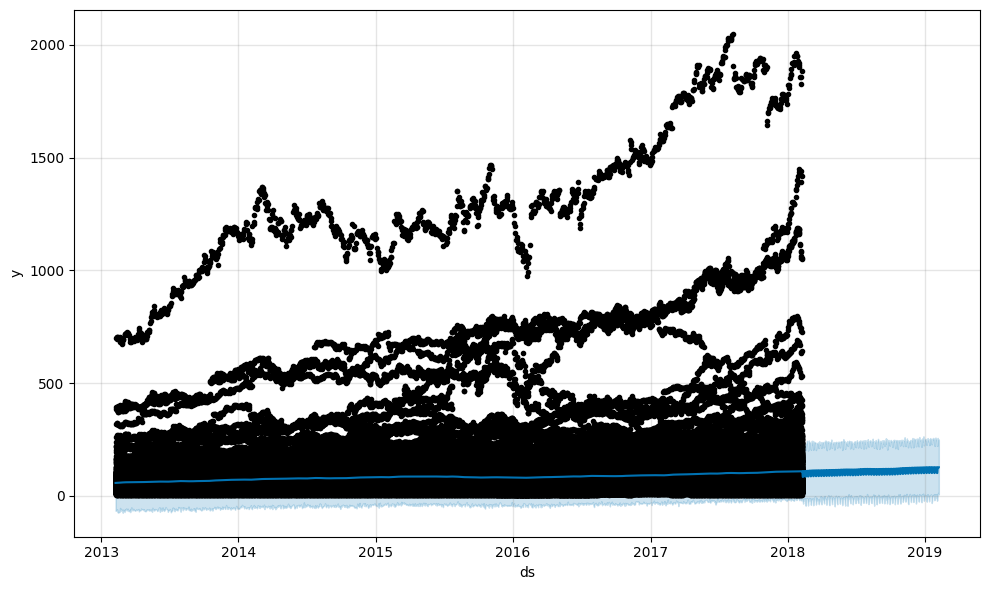

In [53]:
fig1 = model.plot(forecast)

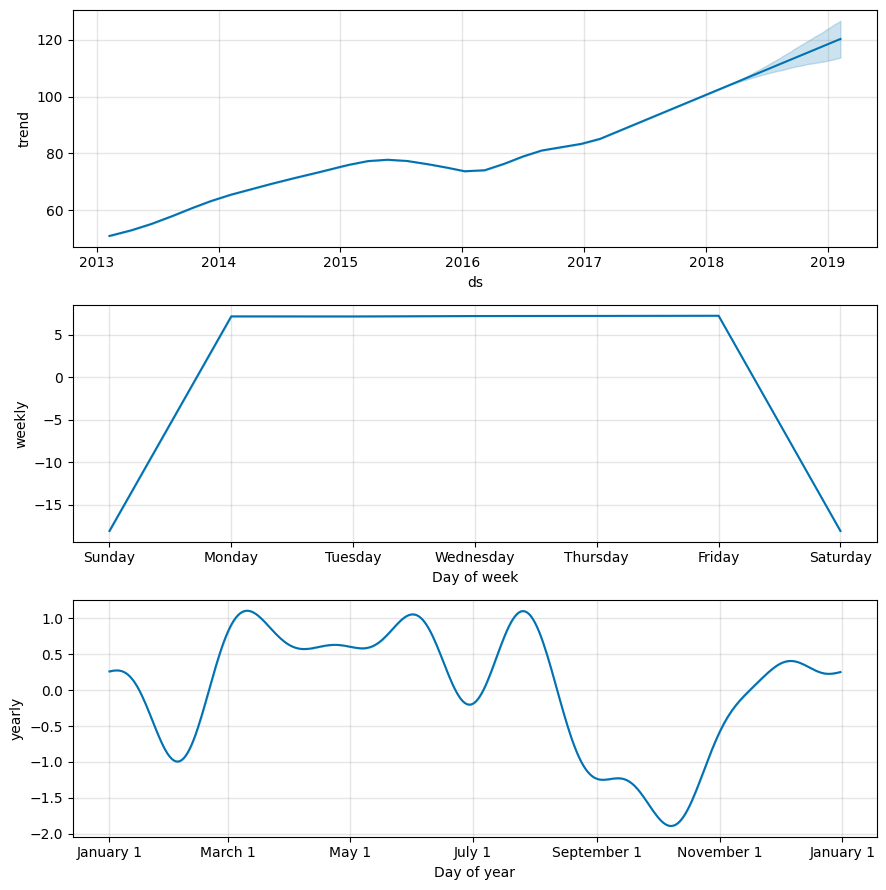

In [54]:
fig2 = model.plot_components(forecast)